In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.io import loadmat

sns.set(style="ticks", context="paper", palette="pastel")
plt.style.use('seaborn')

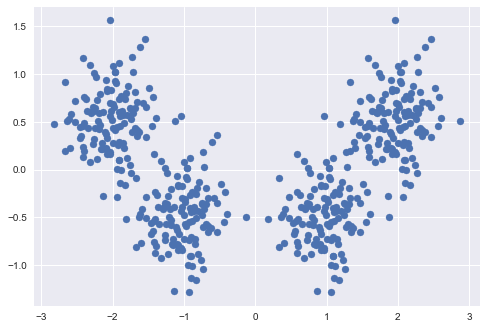

In [2]:
data = np.loadtxt('cluster.dat')

plt.scatter(data[0,:], data[1,:])

colors = ['blue', 'green', 'red', 'yellow', 'purple', 'cyan', 'royalblue', 'gold']

Exercise H8.1:  K-means Clustering – batch version

In [3]:
def cost(w, m, data):
    cost = 0
    for j in range(m.shape[0]):
        idx = m == j
        m_data = data[:,idx]
        if m_data.shape[1] != 0:
            e_dst = m_data - w[:,[j]]
            e_dst = np.linalg.norm(e_dst, axis=0)
            cost += np.sum(e_dst)
    return (cost)/data.shape[1]

def batch_k_means(data, m, m_idx, max_iter=5, plot=True):
    n_features = data.shape[0]
    n_data = data.shape[1]

    w = np.ones((n_features, m))
    w = np.multiply(w.T, np.mean(data, axis=1)).T + np.random.normal(scale=1e-3, size=w.shape)

    w_init = w.copy()

    m_arr = np.zeros(n_data)
    costs = np.zeros(max_iter)
    for i in range(max_iter):
        for j in range(n_data):
            dst_arr = np.zeros(m)
            for k in range(m):
                dst_arr[k] = np.linalg.norm(data[:, j] - w[:,k])
            m_arr[j] = np.argmin(dst_arr)
            
        #plotting data
        if plot:
            plot_result(data, w, m, m_arr, i, m_idx)

        # compute new prototypes
        k_mean = w
        for k in range(m):
            k_cluster_data_idx = (m_arr == k)
            k_cluster_data = np.zeros(len(k_cluster_data_idx))
            k_cluster_data = data[:,k_cluster_data_idx]
            if k_cluster_data.shape[1] != 0:
                k_mean[:,k] = np.mean(k_cluster_data, axis=1)

        k_mean #new prototypes
        w = k_mean

        # for j in range(n_data):
        #    e_dst = w - data[:,[j]]
        #    e_dst = np.linalg.norm(e_dst, axis=0)
        #    arg_dst = np.argmin(e_dst)
        #    m_arr[j] = arg_dst
                         
        costs[i] = cost(w, m_arr, data)
        # for j in range(m):
        #     idx = m_arr == j
        #     m_data = data[:,idx]
        #     if m_data.shape[1] != 0:
        #         w[:,j] = np.mean(m_data, axis=1)


    return w, w_init, m_arr, costs

def plot_result(data, w, m, m_arr, itr_num, m_idx):
    for i in range(m):
        idx = m_arr == i
        m_data = data[:,idx]
        ax[itr_num][m_idx].scatter(m_data[0], m_data[1], label=i, color=colors[i])
        
    ax[itr_num][m_idx].scatter(w[0,:], w[1,:], color='black')
    ax[itr_num][m_idx].set_title('Clusters')

    #handles, labels = ax[itr_num][m_idx].get_legend_handles_labels()
    #fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0., 0.5, 0.5))

    #ax[1].plot(np.arange(costs.shape[0]), costs)
    #ax[1].set_title('Costs')

    #fig.suptitle('M = {}'.format(m))
    #fig.tight_layout()
    #plt.show()

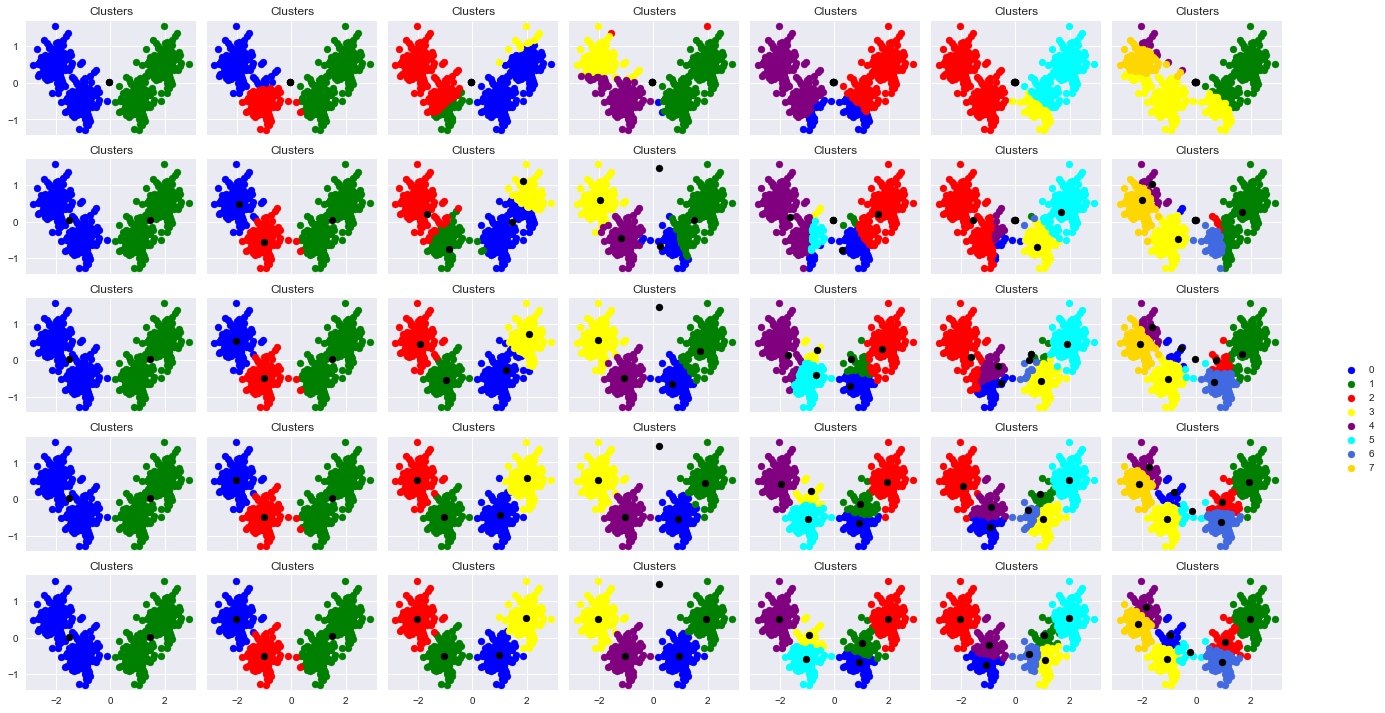

In [4]:
ms =  [2, 3, 4, 5, 6, 7, 8]
no_of_itr = 5

fig, ax = plt.subplots(no_of_itr, len(ms) ,figsize=(18,10), sharex=True, sharey=True)
for i, m in enumerate(ms):
    res = batch_k_means(data, m, i, no_of_itr)
    # plot_result(data, res[0], m, res[2], res[3])
    # fig.legend(lines, labels)
fig.tight_layout()
# color_cycle = plt.rcParams['axes.prop_cycle']()
handles, labels = ax[-1,-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.8, 0., 0.5, 0.5))

In [5]:
def kmeans_cluster(data, w):
    n_features = data.shape[0]
    n_data = data.shape[1]
    m = w.shape[1]
    m_arr = np.zeros(n_data)
    for j in range(n_data):
        dst_arr = np.zeros(m)
        for k in range(m):
            dst_arr[k] = np.linalg.norm(data[:, j] - w[:,k])
        m_arr[j] = np.argmin(dst_arr)
    return m_arr

In [6]:

num_data = 200

min_val = np.min(data, axis=1) - 0.1
max_val = np.max(data, axis=1) + 0.1

data_range_x = np.linspace(min_val[0], max_val[0], num_data)
data_range_y = np.linspace(min_val[1], max_val[1], num_data)

xx, yy = np.meshgrid(data_range_x, data_range_y)
datapoints = np.vstack([xx.ravel(), yy.ravel()])

fig,ax = plt.subplots(len(w_arr), figsize=(10, 40))

for i, w in enumerate(w_arr):
    m1 = kmeans_cluster(datapoints, w).reshape((num_data,num_data))
    im = ax[i].imshow(m1, interpolation='nearest', aspect='auto', extent = [min_val[0] , max_val[0], min_val[1] , max_val[1]], cmap='Dark2')
    #fig.colorbar(im, ax=ax[i])
    ax[i].set_title('Decision Boundary Plot for M = {}'.format(ms[i]))
for i in range(len(w_arr)):
    fig.colorbar(im, ax=ax[i])
fig.tight_layout();

NameError: name 'w_arr' is not defined

In [ ]:
costs = []
w_arr = []
for i, m in enumerate(ms):
    for j in range(2):
        res = batch_k_means(data, m, i, no_of_itr, plot=False)
        costs.append(res[-1])
    w_arr.append(res[0])

fig, ax = plt.subplots(len(ms), 1 ,figsize=(18,10), sharex=True)
for i in range(len(ms)):
    ax[i].plot(costs[i*2], label='1')
    ax[i].plot(costs[(i+1)*2 - 1], label='2')
    ax[i].set_title('M = {}'.format(ms[i]))

handles, labels = ax[-1].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.8, 0., 0.5, 0.5), title='Init Prototypes Values')
fig.suptitle('Costs')


Exercise H8.2: Online K-means Clustering

In [ ]:
def online_kmeans(data, num_m, tau=0.99, eps0=0.1):
    n_features = data.shape[0]
    n_data = data.shape[1]

    w = np.ones((n_features, num_m))
    w = np.multiply(w.T, np.mean(data, axis=1)).T + np.random.normal(scale=1e-3, size=w.shape)
    
    tau_multiplier = np.ones(n_data)
    tau_multiplier[int(n_data*0.25):] = tau

    W = np.zeros((n_data+1, n_features, num_m))
    W[0] = w

    eps = eps0*tau_multiplier[0] 

    for i in range(n_data):
        dst_arr = np.zeros(num_m)
        for k in range(num_m):
            dst_arr[k] = np.linalg.norm(data[:, i] - w[:,k])
        m_min = np.argmin(dst_arr)

        w[:,m_min] += eps*(data[:,i] - w[:,m_min])
        
        W[i+1,:,:] = w    
        
        eps *= tau_multiplier[i]

    return W

In [ ]:
def online_kmeans_costs(data, w):
    m = kmeans_cluster(data, w)
    return cost(w, m, data)

In [ ]:
num_m = 4
W = online_kmeans(data, num_m)
w = W[-1,:,:]
m = kmeans_cluster(data, w)

In [ ]:
for i in range(num_m):
    idx = m == i
    m_data = data[:,idx]
    plt.scatter(m_data[0], m_data[1], label=i, color=colors[i])

plt.plot(W[:,0,0], W[:,1,0], color='purple')
plt.scatter(W[0,0,0], W[0,1,0], marker='x', color='black')
plt.scatter(W[-1,0,0], W[-1,1,0], marker='o', color='black')

plt.plot(W[:,0,1], W[:,1,1], color='aqua')
plt.scatter(W[0,0,1], W[0,1,1], marker='x', color='black')
plt.scatter(W[-1,0,1], W[-1,1,1], marker='o', color='black')

plt.plot(W[:,0,2], W[:,1,2], color='darkred')
plt.scatter(W[0,0,2], W[0,1,2], marker='x', color='black')
plt.scatter(W[-1,0,2], W[-1,1,2], marker='o', color='black')

plt.plot(W[:,0,3], W[:,1,3], color='gold')
plt.scatter(W[0,0,3], W[0,1,3], marker='x', color='black')
plt.scatter(W[-1,0,3], W[-1,1,3], marker='o', color='black')
plt.show()

In [ ]:
online_costs = np.zeros(W.shape[0])
for i in range(W.shape[0]):
    w = W[i]
    online_costs[i] = online_kmeans_costs(data, w)

In [ ]:
plt.plot(online_costs)
plt.xlabel('iteration')
plt.ylabel('cost')
plt.title('Online K-Means Cost Function');

Exercise H8.3: Soft K-means Clustering

In [ ]:
def soft_kmeans(data, num_m, tau=0.99, beta0=0.2, theta = 0.01, is_annealed = False):
    n_features = data.shape[0]
    n_data = data.shape[1]

    w = np.ones((n_features, num_m))
    w = np.multiply(w.T, np.mean(data, axis=1)).T + np.random.normal(scale=1e-3, size=w.shape)
    
    tau_multiplier = np.ones(n_data)
    tau_multiplier[int(n_data*0.25):] = tau

    # W = np.zeros((n_data+1, n_features, num_m))
    # W[0] = w

    if(!is_annealed) :
        beta_list = np.arange(0.2, 20, 0.2)
        for beta in beta_list:
            del_w = np.ones(num_m)
            a_probs = np.zeros((num_m, n_data))
            while(del_w > theta).any():
                for k in range(m):
                    for a in range(n_data):
                        a_probs[k, a] = np.exp(-0.5 * beta * np.linalg.norm(data[:,a] - w[:,k])**2)
                        
                a_probs_sum = np.sum(a_probs, axis=0)
                a_probs = a_probs / a_probs_sum

                for k in range(m):
                    w[:,k] = np.multiply(data, a_probs[k])


                    k_cluster_data_idx = (m_arr == k)
                    k_cluster_data = np.zeros(len(k_cluster_data_idx))
                    k_cluster_data = data[:,k_cluster_data_idx]
                    if k_cluster_data.shape[1] != 0:
                        k_mean[:,k] = np.mean(k_cluster_data, axis=1)

                k_mean #new prototypes
                del_w = np.linalg.norm(k_mean - w)





    beta = beta0*tau_multiplier[0]
    for i in range(n_data):
        dst_arr = np.zeros(num_m)
        for k in range(num_m):
            dst_arr[k] = np.linalg.norm(data[:, i] - w[:,k])
        m_min = np.argmin(dst_arr)

        w[:,m_min] += eps*(data[:,i] - w[:,m_min])
        
        W[i+1,:,:] = w    
        
        eps *= tau_multiplier[i]

    return W

In [15]:

a_probs = np.random.random((10,10))
a_probs_sum = np.sum(a_probs, axis=0)
a_probs = a_probs / a_probs_sum[:, np.newaxis]

IndentationError: unexpected indent (<ipython-input-15-849a50d11612>, line 3)

In [16]:
a_probs_sum

NameError: name 'a_probs_sum' is not defined

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=5d5ddffc-812d-4fa9-9c94-ac36d248b5e9' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>